<a href="https://colab.research.google.com/github/viniciusriosfuck/python-financas/blob/main/Python_para_finan%C3%A7as_simula%C3%A7%C3%B5es_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - simulação Monte Carlo para previsão de preços de ações

## Importação das bibliotecas e preparação da base de dados

$$ v_{n+1} = v_{n}\cdot\mathrm{e}^{r} $$

Movimento Browniano
 * drift: direção
 $$ \textrm{drift} = \mu - \frac{1}{2}\sigma^2 $$
 * volatilidade: variável aleatória
 $$ \textrm{volatility} = \sigma Z[\textrm{Rand}(0;1)] $$
 $$ r =\textrm{drift} +  \textrm{volatility} =  (\mu - \frac{1}{2}\sigma^2 ) + \sigma Z[\textrm{Rand}(0;1)] $$
 $$ S_t = S_{t-1} \cdot \mathrm{e}^{(\mu - \frac{1}{2}\sigma^2 ) + \sigma Z[\textrm{Rand}(0;1)]} $$


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats

import pandas as pd
from pandas_datareader import data

acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

acoes_df = acoes_df.rename(
    columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
             'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

acoes_df.dropna(inplace=True)
acoes_df.to_csv('acoes.csv')

dataset_raw = pd.read_csv('acoes.csv')

days_bolsa = 246

In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.200000,11.846153,0.232812,11.910702,47.259998
1,2015-01-05,14.850000,15.000000,11.926923,0.237187,11.544731,46.320000
2,2015-01-06,15.210000,14.800000,11.750000,0.234062,10.822770,46.580002
3,2015-01-07,14.550000,14.670000,11.615384,0.241875,10.746248,48.150002
4,2015-01-08,14.270000,14.150000,11.811538,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
1498,2021-01-22,22.670000,18.370001,88.260002,26.000000,30.150000,113.180000
1499,2021-01-26,22.209999,17.440001,88.949997,25.750000,30.110001,112.970001
1500,2021-01-27,23.030001,18.020000,88.690002,25.790001,28.740000,112.970001
1501,2021-01-28,24.610001,19.240000,87.970001,26.190001,29.459999,113.910004


In [ ]:
figura = px.line(title = 'Histórico do preço das ações')
for i in dataset.columns[1:]:
  figura.add_scatter(x=dataset['Date'], y=dataset[i], name=i)
figura.show()

In [ ]:
dataset = pd.DataFrame(dataset['BOVA'])
dataset

,BOVA
0,47.259998
1,46.320000
2,46.580002
3,48.150002
4,48.509998
...,...
1498,113.180000
1499,112.970001
1500,112.970001
1501,113.910004


In [ ]:
dataset_normalizado = dataset.copy()
dataset_normalizado /= dataset_normalizado.iloc[0]
# for i in dataset:
#   dataset_normalizado[i] = dataset[i] / dataset[i][0]
dataset_normalizado

,BOVA
0,1.000000
1,0.980110
2,0.985612
3,1.018832
4,1.026449
...,...
1498,2.394837
1499,2.390394
1500,2.390394
1501,2.410284


In [ ]:
dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
dataset_taxa_retorno

,BOVA
0,NaN
1,-0.020090
2,0.005597
3,0.033150
4,0.007449
...,...
1498,-0.011246
1499,-0.001857
1500,0.000000
1501,0.008286


In [ ]:
dataset_taxa_retorno.fillna(0, inplace=True)
dataset_taxa_retorno.head()

,BOVA
0,0.000000
1,-0.020090
2,0.005597
3,0.033150
4,0.007449


## Cálculo do drift

In [ ]:
media = dataset_taxa_retorno.mean()
media

BOVA    0.000565
dtype: float64

In [ ]:
variancia = dataset_taxa_retorno.var()
variancia

BOVA    0.000298
dtype: float64

In [ ]:
drift = media - (0.5 * variancia)
drift

BOVA    0.000416
dtype: float64

## Cálculo dos retornos diários

In [ ]:
dias_frente = 50
simulacoes = 10

In [ ]:
desvio_padrao = dataset_taxa_retorno.std()
desvio_padrao

BOVA    0.017273
dtype: float64

In [ ]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))

In [ ]:
Z.shape

(50, 10)

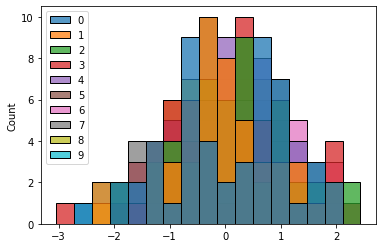

In [ ]:
sns.histplot(Z);

In [ ]:
Z

array([[-5.34182174e-01, -2.08222207e+00,  9.60822847e-01,
         4.88811741e-01, -1.46770467e+00, -9.67536676e-02,
        -1.81008592e-01,  9.68899548e-01, -8.46142769e-01,
         7.19903924e-01],
       [-2.31970902e-01,  1.67868451e+00,  1.24599840e+00,
         2.10104944e-01,  1.63658094e-01,  7.67842318e-01,
        -1.66675650e+00, -9.38091302e-01, -8.16765649e-01,
         9.75668352e-01],
       [ 8.33378237e-01, -3.64782103e-01, -4.89897590e-03,
        -3.04717156e+00,  1.15087763e+00,  1.85846807e+00,
         1.01701776e+00,  1.04405700e-01, -1.01364678e+00,
        -2.03157275e-01],
       [ 7.17058582e-01, -6.15813314e-01,  1.58441866e+00,
        -9.49055012e-01, -4.39334713e-01, -1.02196056e-01,
         3.50349711e-01, -3.74038550e-02,  9.30936366e-01,
         2.78559478e-01],
       [-7.11829472e-01, -2.26857755e+00, -1.16614963e-01,
         7.29451778e-01,  7.34507693e-01, -1.07807600e+00,
        -1.35991353e-01, -9.56074400e-01, -5.98800656e-01,
        -2.

In [ ]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

In [ ]:
retornos_diarios.shape

(50, 10)

In [ ]:
retornos_diarios

array([[0.99122795, 0.96507414, 1.01715831, 1.00889899, 0.97537265,
        0.99874583, 0.99729336, 1.01730022, 0.98590102, 1.01293426],
       [0.99641584, 1.02984936, 1.02218109, 1.00405366, 1.00324845,
        1.01377337, 0.97202482, 0.98433641, 0.98640143, 1.01741917],
       [1.01492163, 0.99413261, 1.00033172, 0.94912182, 1.02050298,
        1.03305246, 1.01814611, 1.00222217, 0.98305261, 0.99691189],
       [1.01288448, 0.98983127, 1.02817385, 0.98415002, 0.99285323,
        0.99865194, 1.00648891, 0.99977023, 1.01663335, 1.00524159],
       [0.98819099, 0.9619726 , 0.99840325, 1.01310133, 1.01318981,
        0.98195918, 0.99806914, 0.9840307 , 0.99012219, 0.99605893],
       [1.0097093 , 0.98032243, 0.99606141, 0.98193033, 0.99615561,
        1.01048081, 1.00295157, 1.00238677, 0.99321741, 0.98798385],
       [1.03492912, 1.0143136 , 1.00370428, 1.00977009, 1.01435801,
        0.99210999, 0.97535675, 1.00116185, 1.00601814, 1.02431026],
       [0.97272129, 0.97748061, 1.0199597

## Previsões de preços futuros

In [ ]:
previsoes = np.zeros_like(retornos_diarios)

In [ ]:
previsoes.shape

(50, 10)

In [ ]:
previsoes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [ ]:
previsoes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
dataset.tail(1)

,BOVA
1502,110.559998


In [ ]:
dataset.iloc[-1]

BOVA    110.559998
Name: 1502, dtype: float64

In [ ]:
previsoes[0] = dataset.iloc[-1]
previsoes

array([[110.55999756, 110.55999756, 110.55999756, 110.55999756,
        110.55999756, 110.55999756, 110.55999756, 110.55999756,
        110.55999756, 110.55999756],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

In [ ]:
for dia in range(1, dias_frente):
  #print(dia)
  previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

In [ ]:
previsoes.shape

(50, 10)

In [ ]:
92.41000366 * 1.00854274

93.19943829466642

In [ ]:
93.19943859 * 0.98145488

91.47104381741582

In [ ]:
previsoes

array([[110.55999756, 110.55999756, 110.55999756, 110.55999756,
        110.55999756, 110.55999756, 110.55999756, 110.55999756,
        110.55999756, 110.55999756],
       [110.16373305, 113.86014259, 113.01233835, 111.00817044,
        110.91914589, 112.08278116, 107.46706213, 108.82823156,
        109.05654011, 112.48586132],
       [111.80755499, 113.19208069, 113.04982651, 105.3602767 ,
        113.19331896, 115.78739307, 109.41717136, 109.07006632,
        107.20831635, 112.13849206],
       [113.24813707, 112.04106112, 116.23487506, 103.69031841,
        112.38435203, 115.63130471, 110.12716916, 109.04500481,
        108.99155014, 112.72627566],
       [111.91078872, 107.78043078, 116.04927655, 105.04879955,
        113.86668032, 113.54522116, 109.91452946, 107.30363259,
        107.91495218, 112.28201396],
       [112.99736383, 105.6595741 , 115.59220578, 103.1506027 ,
        113.42893268, 114.7352674 , 110.2389496 , 107.55974136,
        107.18300944, 110.93281656],
       [11

## Gráfico das previsões

In [ ]:
figura = px.line(title='Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y=previsoes.T[i], name=i)
figura.show()

## Comparação das previsões com os preços reais

In [ ]:
from pandas_datareader import data
dataset_bova = data.DataReader(name='BOVA11.SA', data_source='yahoo', start='2020-11-04')['Close']
# dataset_bova = dataset_bova.iloc[]

In [ ]:
dataset_bova.to_csv('bova_teste.csv')

In [ ]:
dataset_bova = pd.read_csv('bova_teste.csv')
dataset_bova

,Date,Close
0,2020-11-04,94.419998
1,2020-11-05,96.699997
2,2020-11-06,97.190002
3,2020-11-09,99.769997
4,2020-11-10,101.449997
5,2020-11-11,100.809998
6,2020-11-12,98.760002
7,2020-11-13,100.830002
8,2020-11-16,102.010002
9,2020-11-17,103.339996


In [ ]:
len(dataset_bova)

50

In [ ]:
dataset_bova = dataset_bova.iloc[:50,:]


In [ ]:
simulacao1 = previsoes.T[0][:len(dataset_bova)]
simulacao1

array([110.55999756, 110.16373305, 111.80755499, 113.24813707,
       111.91078872, 112.99736383, 116.94426184, 113.75417299,
       114.93494674, 118.50784024, 118.59024859, 116.33123946,
       117.70448704, 120.68461435, 122.40682191, 119.6250612 ,
       121.74291894, 120.66878845, 118.00024762, 115.41678646,
       118.65575554, 115.07764384, 113.50393171, 114.00193393,
       118.13024091, 116.63810243, 113.30879458, 114.45377306,
       113.67388769, 110.30314991, 109.25360631, 111.32694168,
       110.81505348, 110.93093583, 112.58876889, 113.65012978,
       114.17072272, 117.62652015, 118.32642976, 117.00798074,
       118.28379543, 113.49560917, 112.4092006 , 114.46036387,
       115.87602873, 114.92499688, 114.61919106, 116.86183223,
       118.83290604, 117.86986121])

In [ ]:
len(simulacao1)

50

In [ ]:
from sklearn.metrics import mean_absolute_error
assert np.sum(abs(simulacao1 - dataset_bova['Close'])) / len(simulacao1) == mean_absolute_error(dataset_bova['Close'], simulacao1)
mean_absolute_error(dataset_bova['Close'], simulacao1)

7.520483166803872

In [ ]:
erros = []
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(dataset_bova)]
  erros.append(mean_absolute_error(dataset_bova['Close'], simulacao))
erros

[7.520483166803872,
 4.1505952890898845,
 7.0889996003368765,
 6.556931151036784,
 16.506251767960553,
 10.245210753330007,
 13.581654563382708,
 7.100211449105021,
 6.318538481662375,
 9.551397184830925]

In [ ]:
figura = px.line(title='Previsões do preço das ações - simulação')
figura.add_scatter(y=dataset_bova['Close'], name='Valor real')
figura.add_scatter(y=previsoes.T[np.argmax(erros)], name='Pior simulação')
figura.add_scatter(y=previsoes.T[np.argmin(erros)], name='Melhor simulação')

## Exercício

In [ ]:
acoes_ex = ['ABEV3.SA', 'ODPV3.SA', 'VIVT3.SA', 'PETR3.SA', 'BBAS3.SA', 'BOVA11.SA']
acoes_ex_df = pd.DataFrame()
for acao in acoes_ex:
  acoes_ex_df[acao] = data.DataReader(
      acao,
      data_source='yahoo',
      start='2015-01-01'
      )['Close']
acoes_ex_df.dropna(inplace=True)
acoes_ex_df = acoes_ex_df.rename(columns={
    'ABEV3.SA': 'AMBEV', 'ODPV3.SA': 'ODONTOPREV', 'VIVT3.SA': 'VIVO',
    'PETR3.SA': 'PETROBRAS', 'BBAS3.SA': 'BBRASIL', 'BOVA11.SA': 'BOVA'})
acoes_ex_df.to_csv('acoes_ex.csv')

In [ ]:
def monte_carlo_previsao(dataset, ativo, dias_a_frente, simulacoes):
  dataset = dataset.copy()
  dataset = pd.DataFrame(dataset[ativo])
  
  dataset_normalizado = dataset.copy()
  dataset_normalizado /= dataset_normalizado.iloc[0]
  
  dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
  dataset_taxa_retorno.fillna(0, inplace=True)
  
  media = dataset_taxa_retorno.mean()
  variancia = dataset_taxa_retorno.var()

  drift = media - (0.5 * variancia)
  desvio_padrao = dataset_taxa_retorno.std()
  Z = stats.norm.ppf(np.random.rand(dias_a_frente, simulacoes))
  retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

  previsoes = np.zeros_like(retornos_diarios)
  previsoes[0] = dataset.iloc[-1]

  for dia in range(1, dias_a_frente):
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

  figura = px.line(title = 'Previsões do preço das ações - ' + ativo)
  for i in range(len(previsoes.T)):
    figura.add_scatter(y = previsoes.T[i], name = i)
  figura.show()  

  return previsoes.T

In [ ]:
previsoes = monte_carlo_previsao(pd.read_csv('acoes.csv'), 'GOL', 50, 10)

In [ ]:
previsoes[1]

array([23.95000076, 24.86215911, 24.25202582, 22.71124368, 23.1960904 ,
       21.56106761, 22.61418791, 23.74967565, 23.9155211 , 23.46967905,
       26.72196475, 25.80520133, 25.56568032, 25.49309598, 24.08261018,
       25.78876382, 25.72275954, 27.3484121 , 27.56627176, 28.26291268,
       29.62767805, 30.26788999, 27.49405221, 26.31641688, 28.17599225,
       26.75993104, 27.88568326, 29.4425582 , 31.28788992, 30.31777099,
       27.9311688 , 25.19900299, 25.44339845, 26.23591799, 25.21381688,
       24.16024634, 24.05923533, 25.17326865, 24.12443342, 23.21300849,
       23.31326108, 21.49411387, 21.71914533, 23.30852152, 22.80493626,
       23.24016637, 26.76257992, 25.11975703, 25.95506398, 26.79153374])

In [ ]:
dataset = pd.read_csv('acoes.csv')
for ativo in dataset.columns[1:]:
  #print(ativo)
  monte_carlo_previsao(dataset, ativo, 100, 20)

In [ ]:
dataset = pd.read_csv('acoes_ex.csv')
for ativo in dataset.columns[1:]:
  monte_carlo_previsao(dataset, ativo, 30, 100)